**Importing the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Using matplotlib backend: module://matplotlib_inline.backend_inline


**Loading the Dataset**

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Getting to know the dataset**

In [4]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.drop(["Id"], axis =1, inplace = True)

In [6]:
df["Species"] = df["Species"].str.replace("Iris-", "")

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

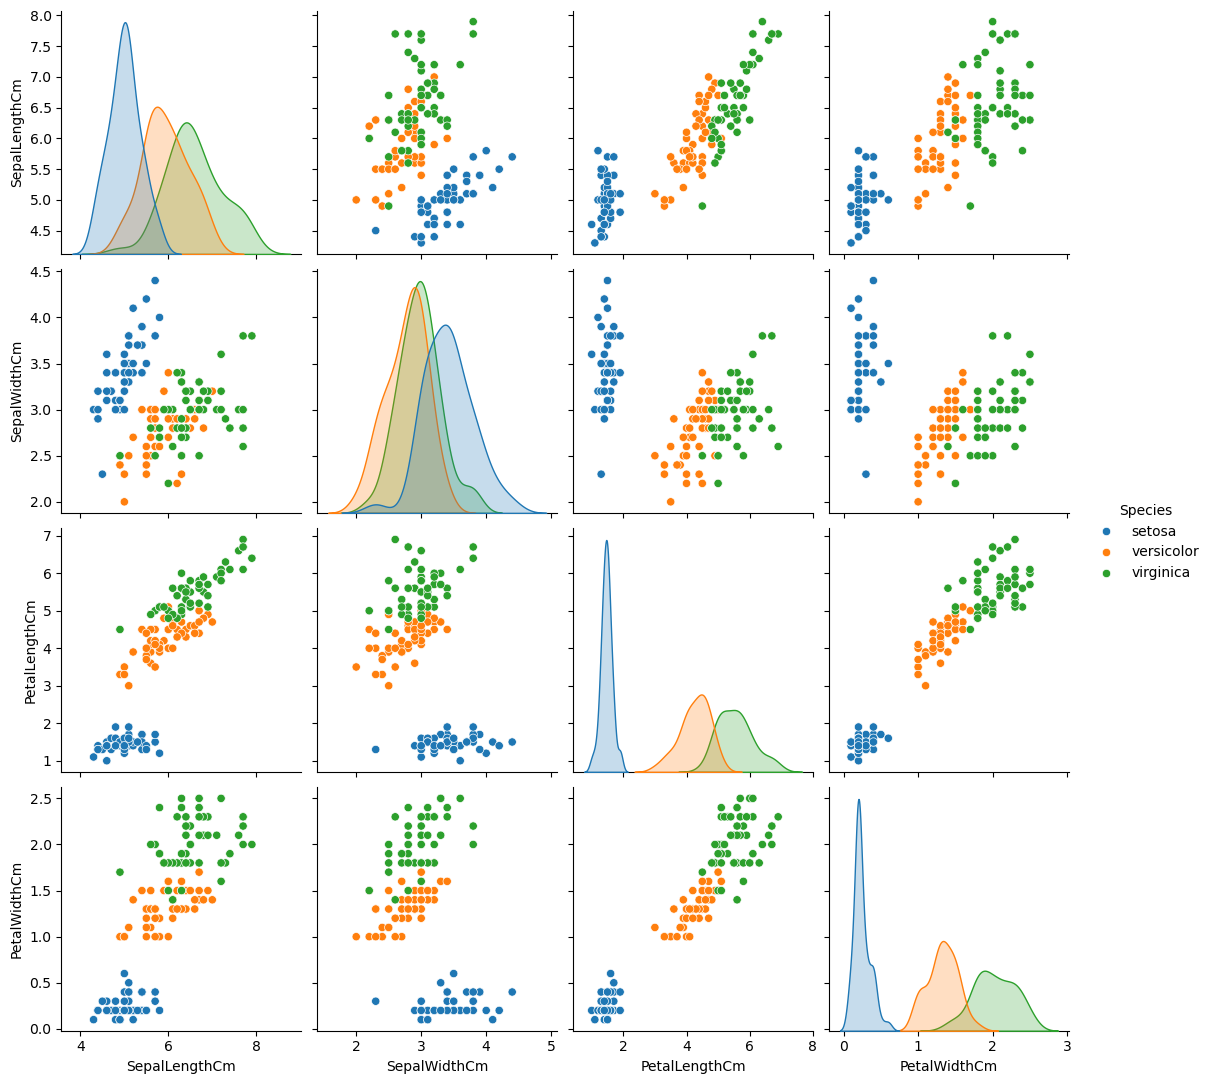

In [9]:
sns.pairplot(df, hue = "Species", height = 2.75)

In [10]:
df["Species_Num"] = df["Species"]

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [12]:
df["Species_Num"] = df["Species_Num"].str.replace("setosa", "1")
df["Species_Num"] = df["Species_Num"].str.replace("versicolor", "2")
df["Species_Num"] = df["Species_Num"].str.replace("virginica", "3")

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [15]:
df["Species_Num"] = pd.to_numeric(df["Species_Num"], downcast = "integer")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


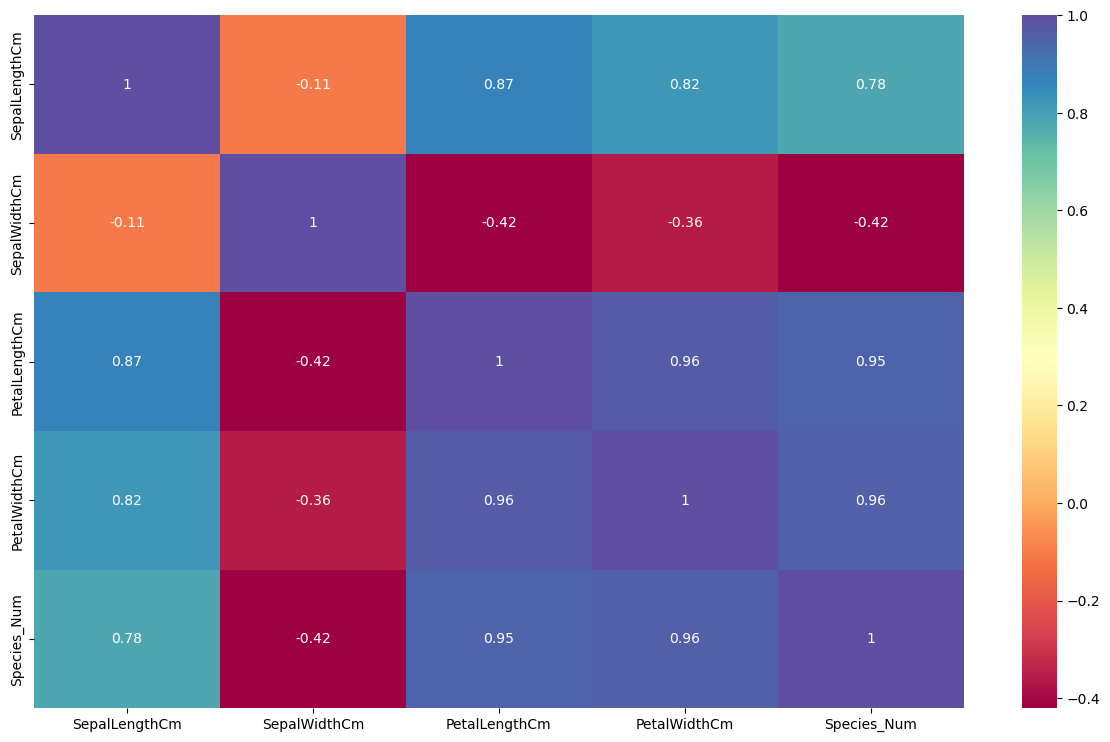

In [17]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(numeric_only = True), cmap='Spectral', annot = True);

In [18]:
df.drop(["PetalLengthCm", "Species_Num"], axis = 1, inplace = True)

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


**Decision Tree Modelling**


In [20]:
X = df.drop(["Species"], axis = 1)
y = df.Species

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_model = DecisionTreeClassifier()

In [25]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [28]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cv_scores = cross_val_score(estimator=dt_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8734848484848483

In [31]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.81818182, 0.90909091, 0.72727273])

In [32]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

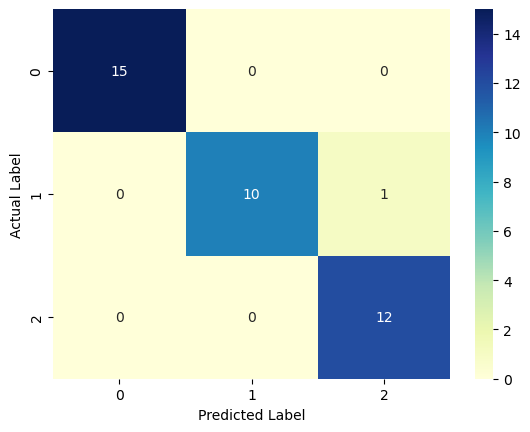

In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
from sklearn import tree

In [36]:
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']

In [37]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica']


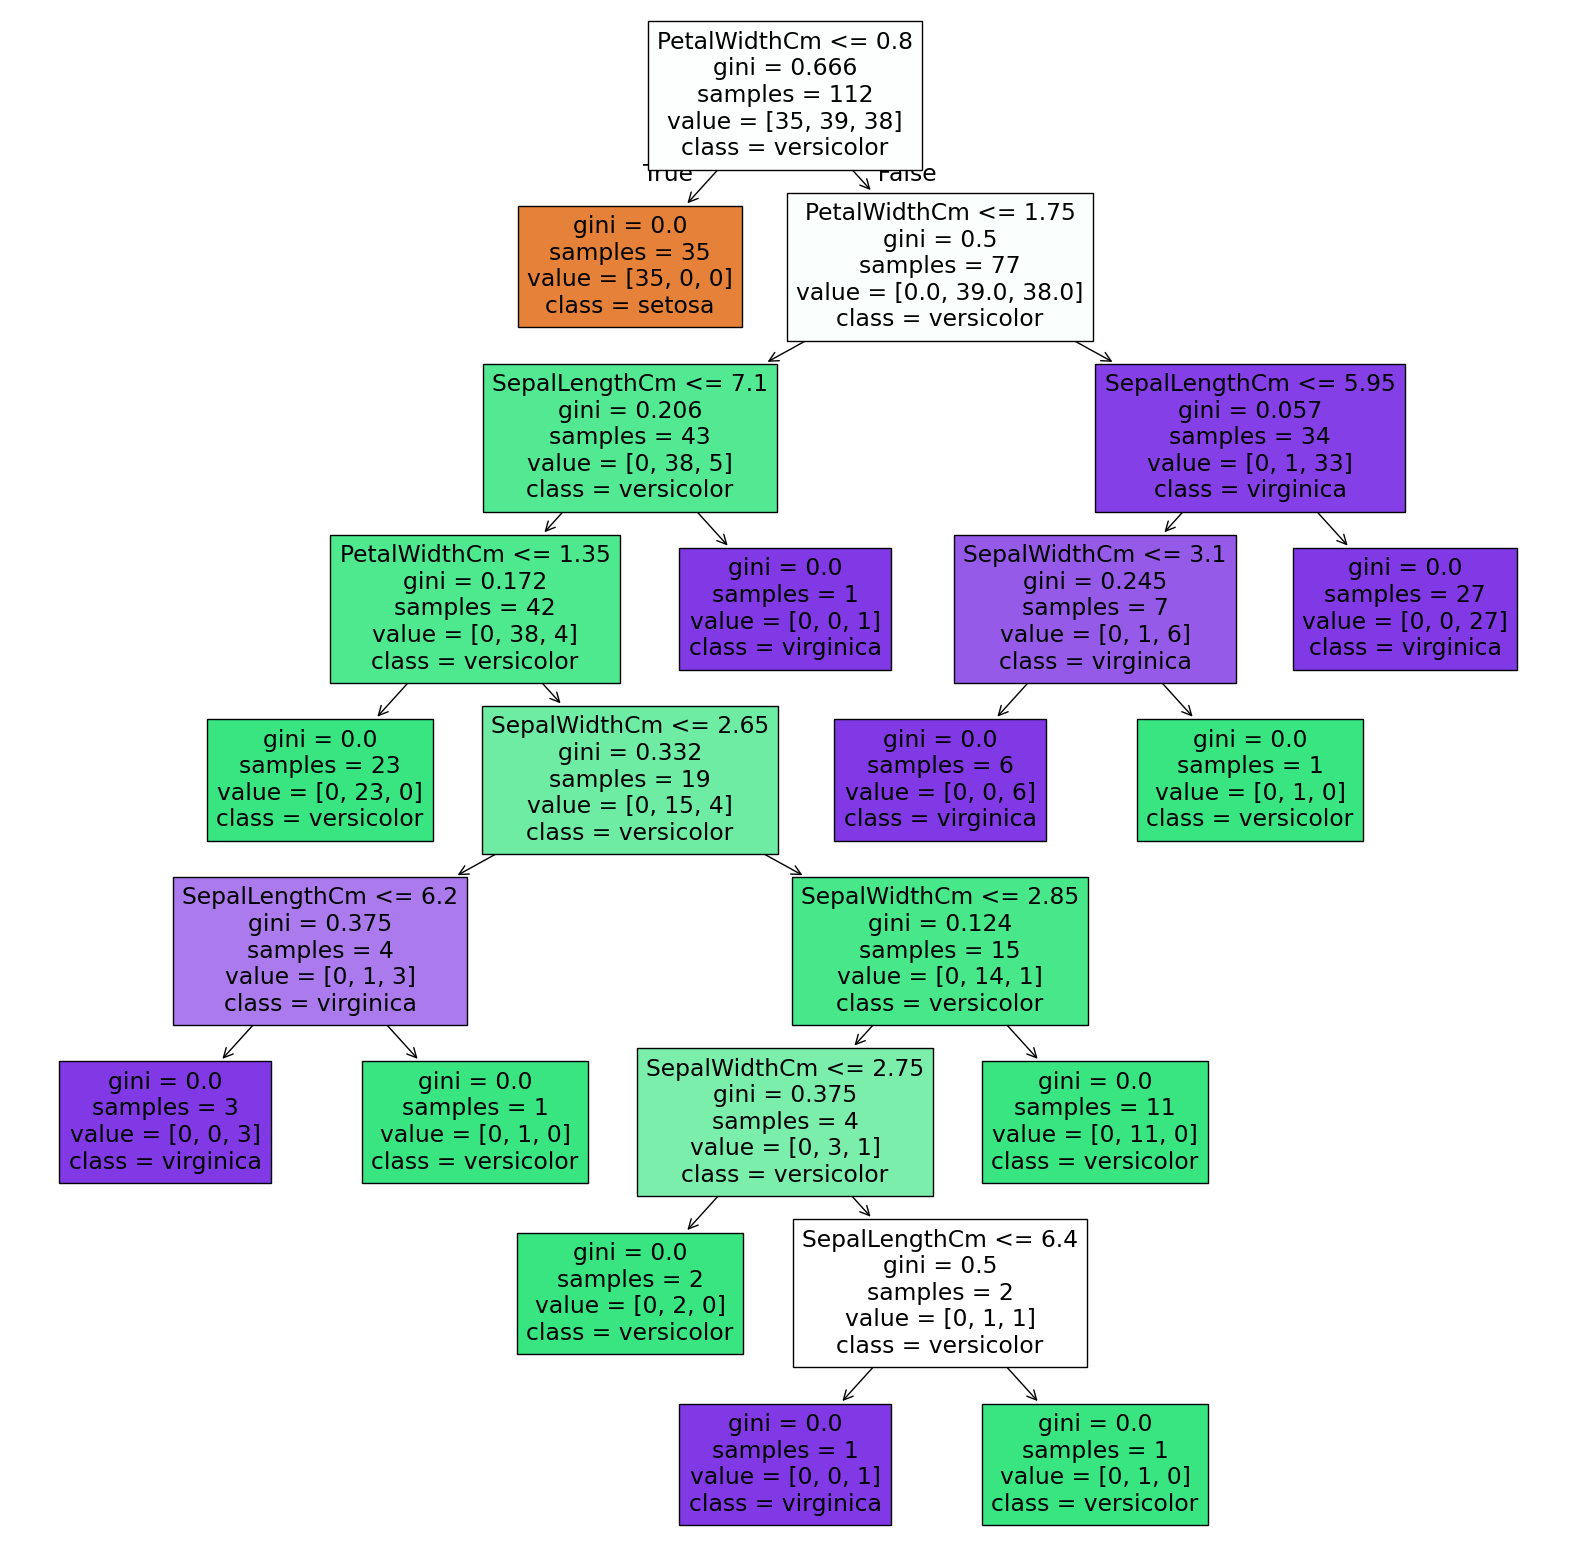

In [38]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_model, filled = True, feature_names = features, class_names = targets)

**Hyperparameter Optimization with Python**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
dt_model2 = DecisionTreeClassifier()

In [41]:
dt_params = {"criterion": ["gini", "entropy"],
              "max_depth" : np.arange(2, 14, 2),
              'max_features': ["auto", "sqrt", "log2"]}

In [42]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_params, cv = 10)

In [43]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [44]:
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

In [45]:
dt_tuned = DecisionTreeClassifier(criterion = "gini", max_depth = 4, max_features = "sqrt")

In [46]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

In [47]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [48]:
cv_scores = cross_val_score(estimator = dt_tuned, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.8015151515151515

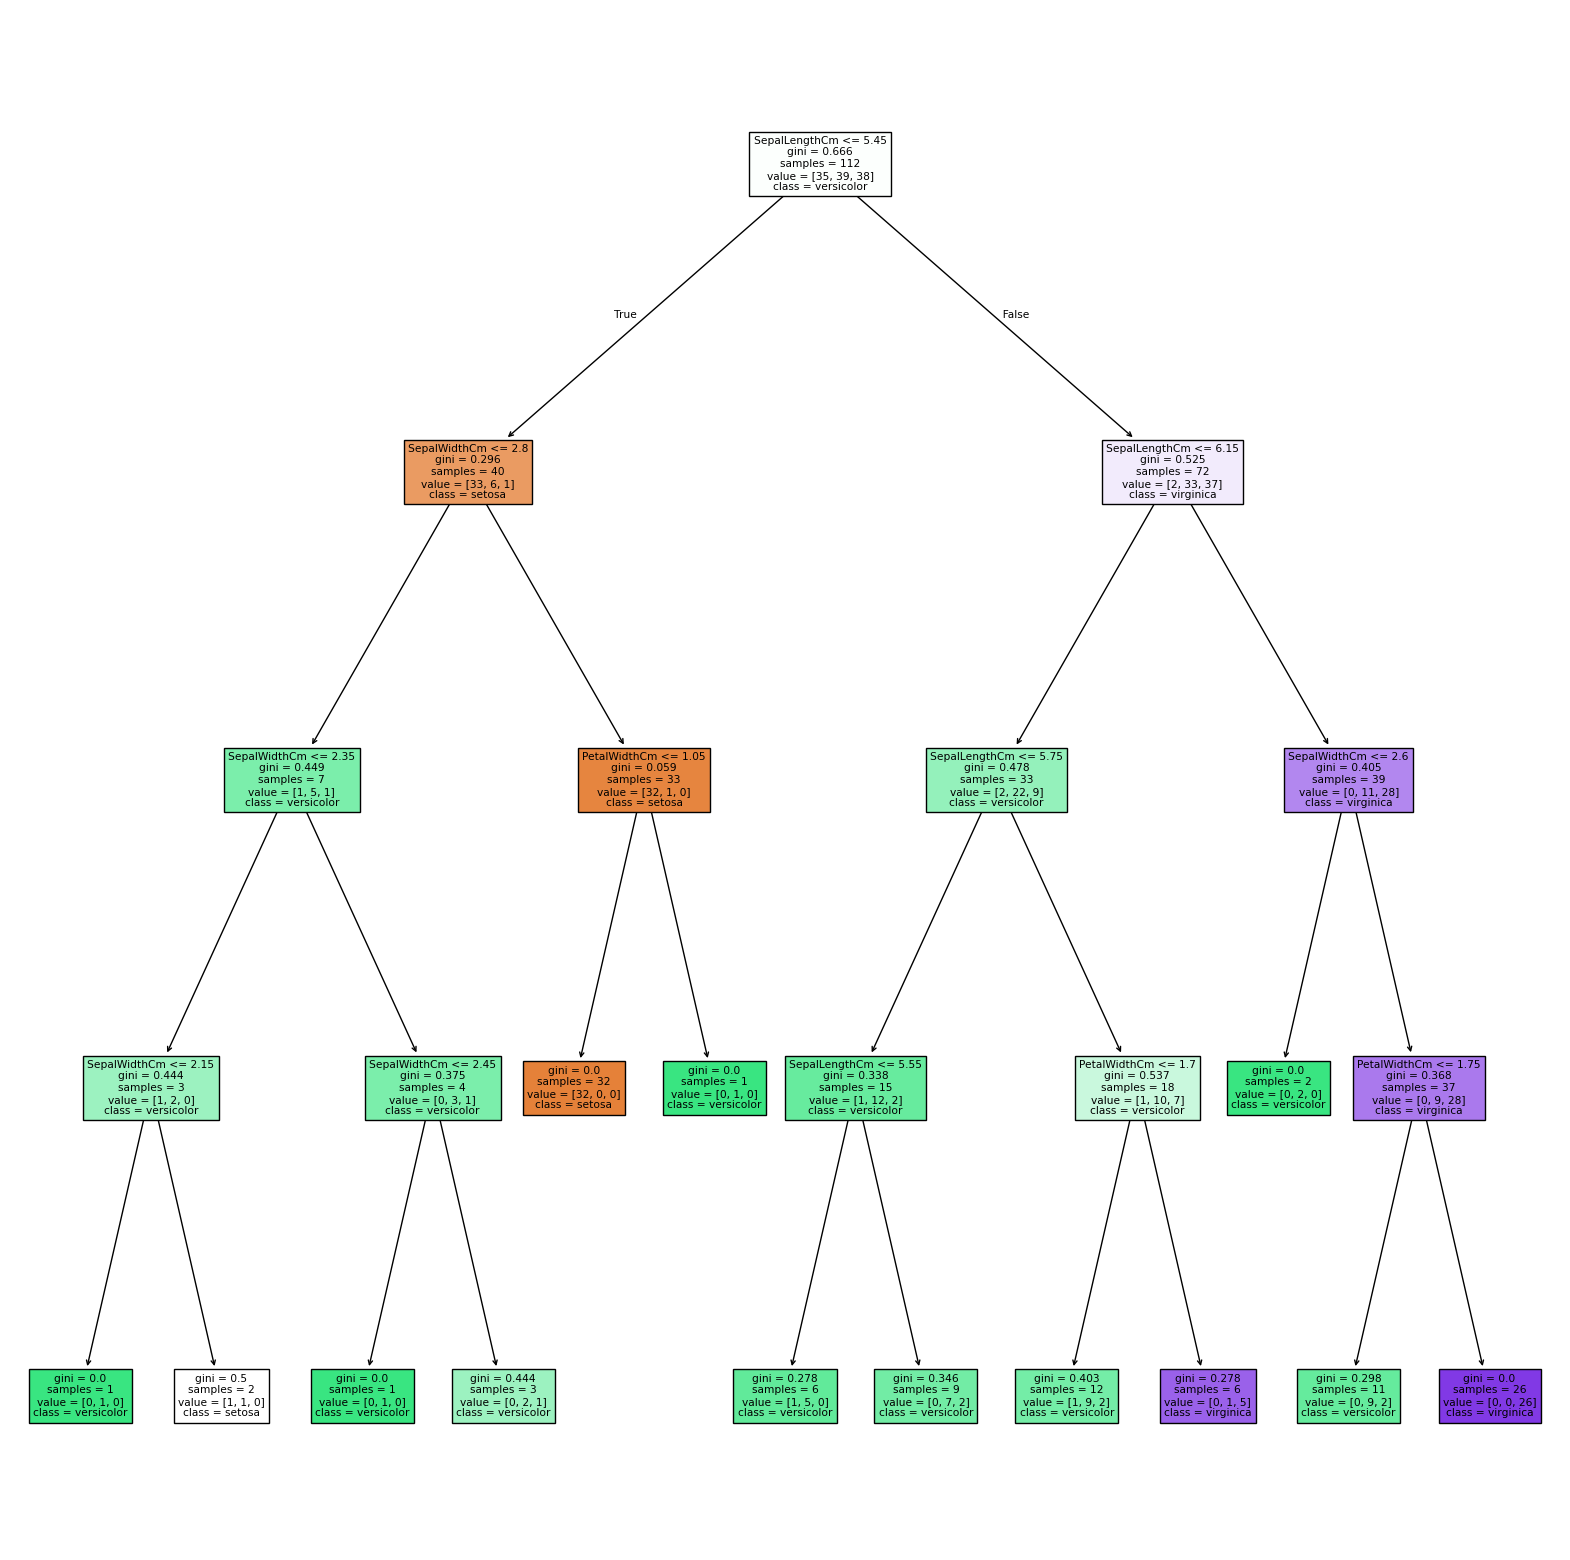

In [49]:
plt.figure(figsize=(20,20)) 
tree2 = tree.plot_tree(dt_tuned, filled=True, feature_names=features , class_names = targets)

**Random Forest Modelling**

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_model = RandomForestClassifier()

In [54]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = rf_model.predict(X_test)

In [56]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [57]:
cv_scores = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
cv_scores.mean()

0.9015151515151514

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted Label')

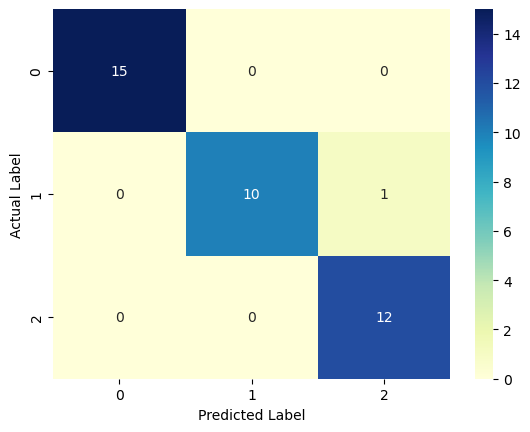

In [60]:
sns.heatmap(cnf_matrix, annot = True, cmap ="YlGnBu", fmt = 'd')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [62]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1737759035),
 DecisionTreeClassifier(max_features='sqrt', random_state=615097607),
 DecisionTreeClassifier(max_features='sqrt', random_state=1721042910),
 DecisionTreeClassifier(max_features='sqrt', random_state=330386546),
 DecisionTreeClassifier(max_features='sqrt', random_state=735185274),
 DecisionTreeClassifier(max_features='sqrt', random_state=1843570321),
 DecisionTreeClassifier(max_features='sqrt', random_state=744011505),
 DecisionTreeClassifier(max_features='sqrt', random_state=216324299),
 DecisionTreeClassifier(max_features='sqrt', random_state=916453199),
 DecisionTreeClassifier(max_features='sqrt', random_state=975359277),
 DecisionTreeClassifier(max_features='sqrt', random_state=823492307),
 DecisionTreeClassifier(max_features='sqrt', random_state=584412160),
 DecisionTreeClassifier(max_features='sqrt', random_state=645844316),
 DecisionTreeClassifier(max_features='sqrt', random_state=692290080),
 DecisionTreeClas

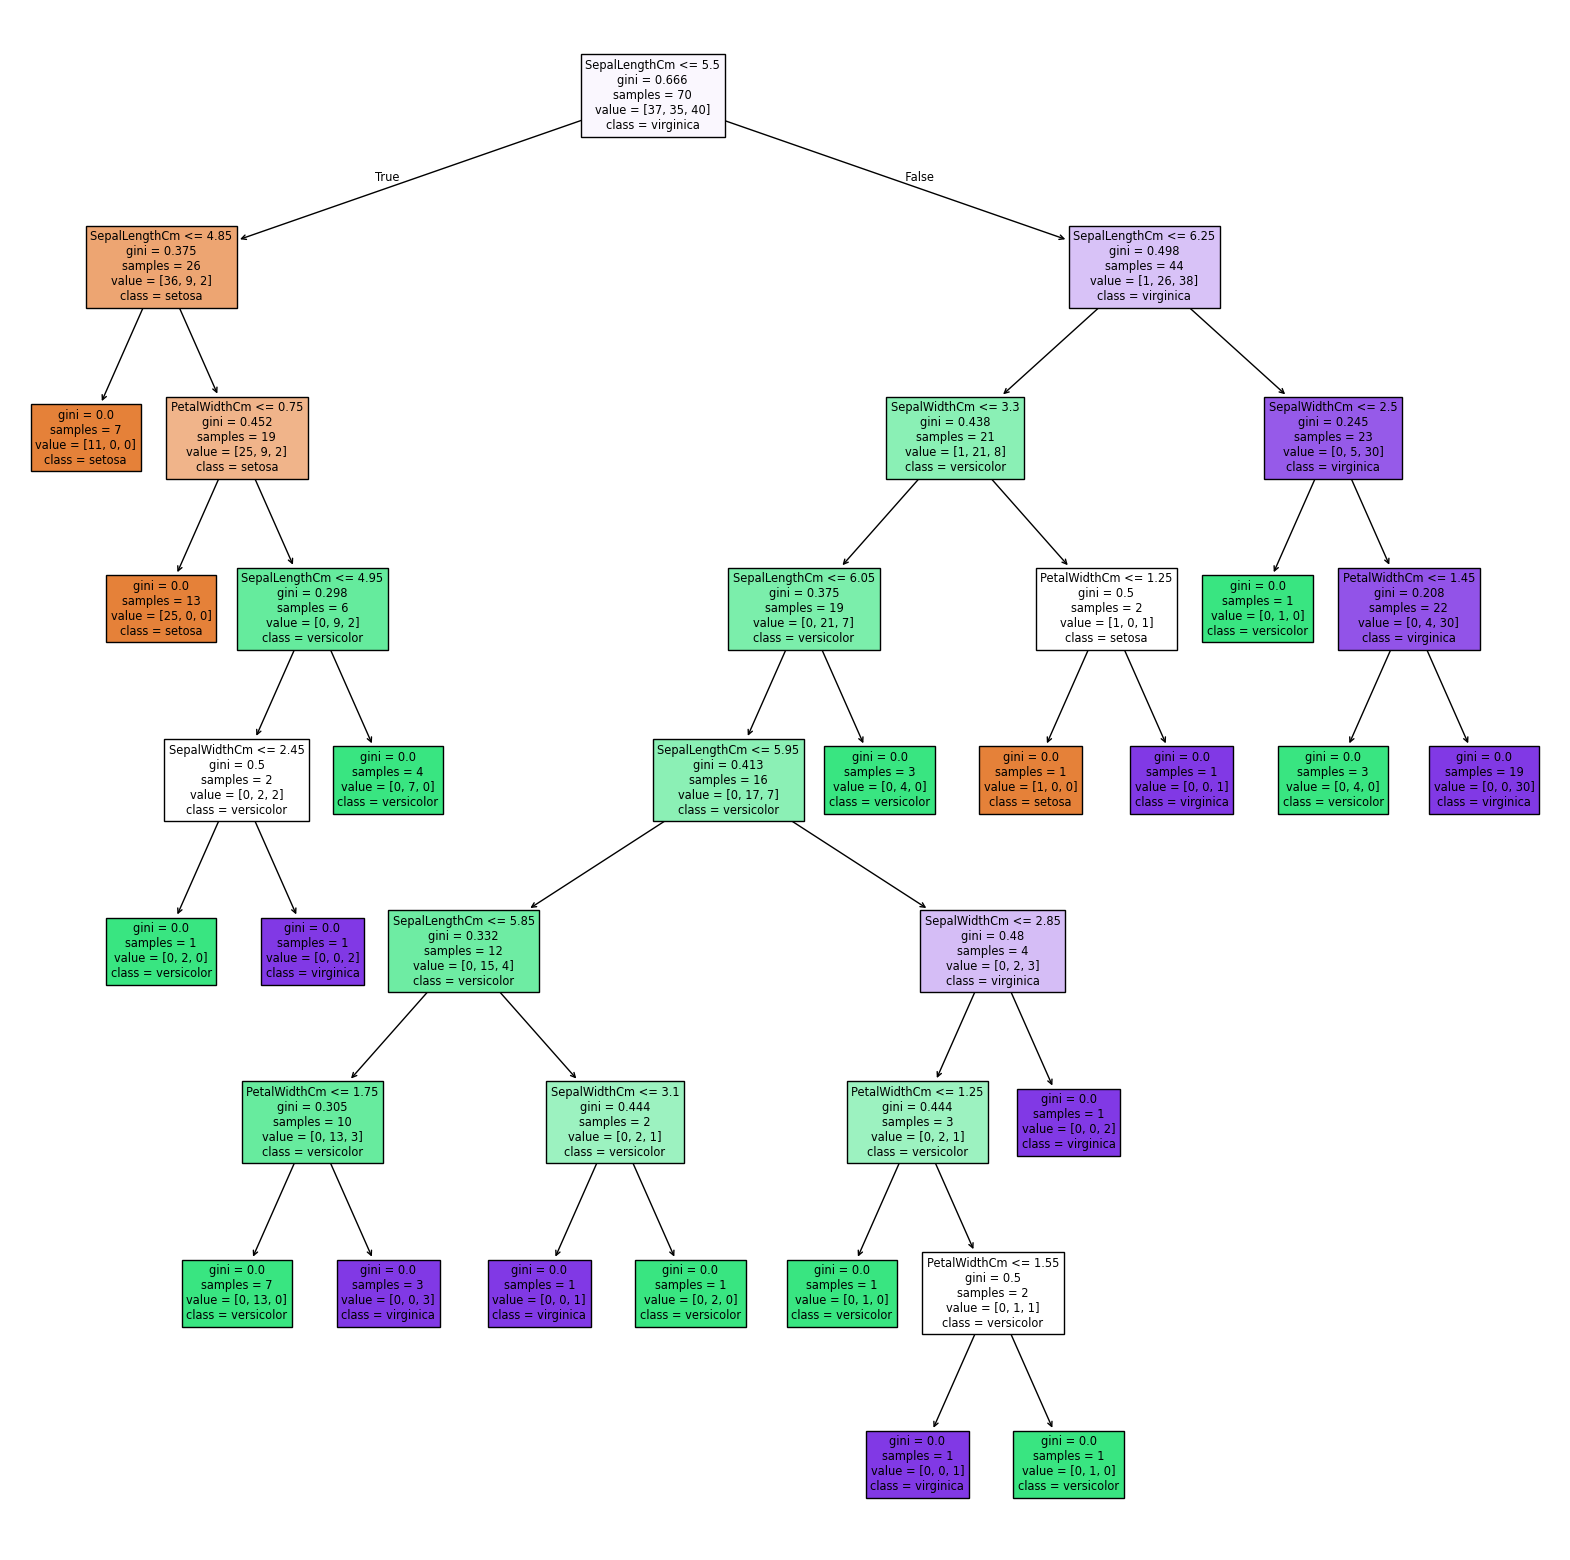

In [64]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(rf_model.estimators_[0], filled = True, feature_names = features, class_names = targets)

**Hyperparameter Optimization with Python**

In [65]:
rf_model2 = RandomForestClassifier()

In [69]:
rf_params = {"n_estimators": [50, 100, 300],
            "max_depth": [3, 5, 7],
            "max_features": [2, 4, 6, 8],
            "min_samples_split": [2, 4, 6]}

In [73]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv = 5, n_jobs = -1)

In [74]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

In [75]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [76]:
rf_tunned = RandomForestClassifier(max_depth = 3, max_features = 2, min_samples_split = 2, n_estimators = 50)

In [77]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

In [78]:
y_pred = rf_tunned.predict(X_test)

In [79]:
print("Accuracy Score", accuracy_score(y_test, y_pred))

Accuracy Score 1.0


In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [82]:
rf_tunned.feature_importances_

array([0.20909488, 0.04570388, 0.74520124])

In [85]:
best_features = pd.Series(rf_tunned.feature_importances_, index = X_train.columns).sort_values(ascending = False)

In [86]:
best_features

PetalWidthCm     0.745201
SepalLengthCm    0.209095
SepalWidthCm     0.045704
dtype: float64

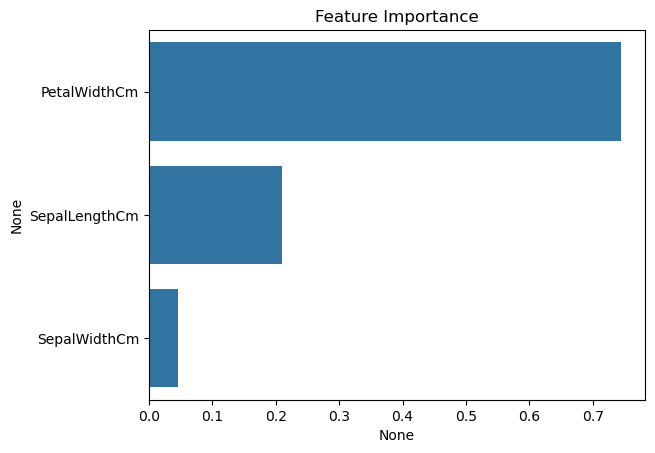

In [87]:
sns.barplot(x = best_features, y = best_features.index)
plt.title("Feature Importance")
plt.show()